<a href="https://colab.research.google.com/github/TheSj78/AI-Projects/blob/main/AI_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install pystan~==2.14.0.0
!pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet
import yfinance as yf

def make_forecast(ticker, future_days, history='max'):
    """
    ticker
        stock name
    future_days
        days for which prediction should last
    history
        has to be: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
        defaults to max
    """

    hist_data = yf.Ticker(ticker).history(history, auto_adjust=True)

    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values #'Close' = at the end of the day

    m = Prophet()
    m.fit(df)

    forecast = m.predict(m.make_future_dataframe(future_days, freq='D', include_history=True))

    m.plot(forecast, xlabel=ticker+'\'s stock', ylabel='Value', plot_cap=False )

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6toz56m/qh81dw99.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6toz56m/hsb9rv6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91104', 'data', 'file=/tmp/tmpk6toz56m/qh81dw99.json', 'init=/tmp/tmpk6toz56m/hsb9rv6b.json', 'output', 'file=/tmp/tmpk6toz56m/prophet_modelb__cgkza/prophet_model-20230620161927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:19:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:19:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


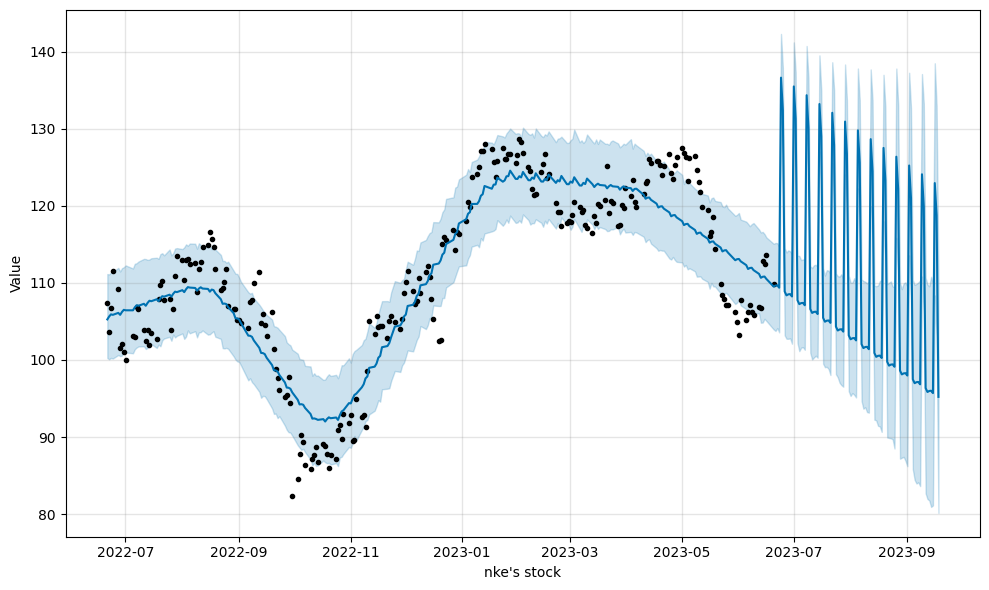

In [ ]:
make_forecast('nke', 90, history='1y')